# preparing data to use



## install libraries

In [1]:
# !pip install pandas --upgrade --quiet
# !pip install numpy --upgrade --quiet
# !pip install fuzzy-c-means --upgrade --quiet
# !pip install matplotlib seaborn --upgrade --quiet

## import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from fcmeans import FCM 
from sklearn.cluster import KMeans

## read data

In [3]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## drop unimportant columns and encode the data

In [4]:
#drop CustomerID column
df.drop(['CustomerID'], axis=1, inplace=True)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [5]:
#encode gender column (female : 0, male : 1)
gender_mapping = {"Female": 0, "Male": 1}
df['Gender'] = df['Gender'].map(gender_mapping)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


## Analysis and Visualize the dataset

### Analysis the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [7]:
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [8]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
gender_counts = df.Gender.value_counts()
gender_counts

0    112
1     88
Name: Gender, dtype: int64

### Visualize the dataset

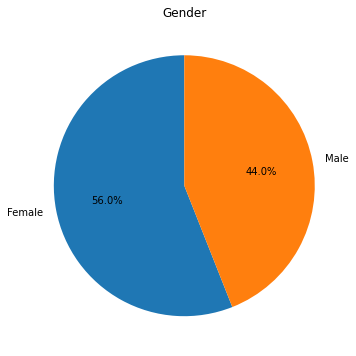

In [10]:
#draw the Gender column
plt.figure(figsize=(12,6))
plt.title("Gender")
labels=['Female','Male']
plt.pie(gender_counts,labels=labels , autopct='%1.1f%%', startangle=90);

as we see The number of females is slightly greater than the number of males

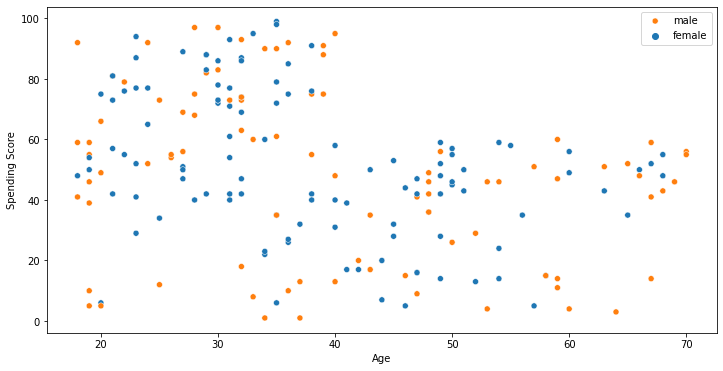

In [11]:
# draw the The relationplot between age and Spending Score
plt.figure(figsize=(12,6))
sns.scatterplot(x='Age', y=r'Spending Score (1-100)', hue='Gender', data=df)
plt.legend(labels=["male", "female"], loc ="upper right")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show();

We can see from the figure that the older the age, the lower the spending score

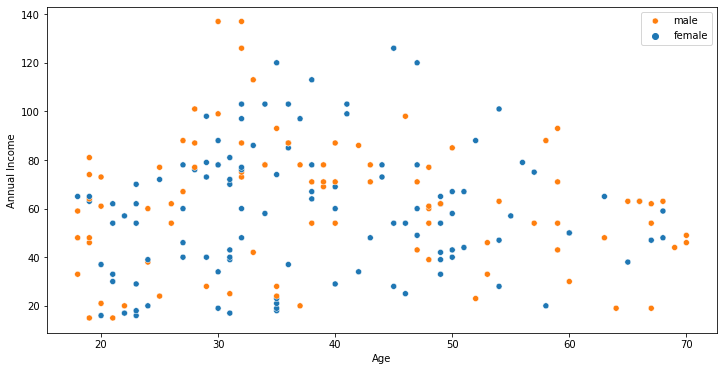

In [12]:
# draw the The relationplot between age and Annual Income
plt.figure(figsize=(12,6))
sns.scatterplot(x='Age', y=r'Annual Income (k$)', hue='Gender', data=df)
plt.legend(labels=["male", "female"], loc ="upper right")
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.show();

From the figure, we conclude that annual income does not depend on age

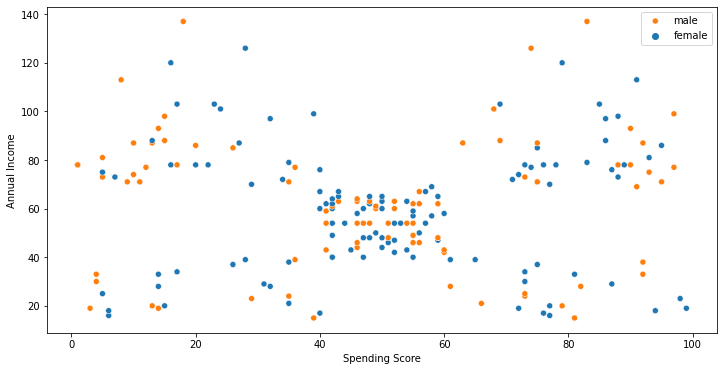

In [13]:
# draw the The relationplot between Spending Score and Annual Income
plt.figure(figsize=(12,6))
sns.scatterplot(x='Spending Score (1-100)', y=r'Annual Income (k$)', hue='Gender', data=df)
plt.legend(labels=["male", "female"], loc ="upper right")
plt.xlabel("Spending Score")
plt.ylabel("Annual Income")
plt.show();

From the figure, we conclude that annual income does not depend on Spending Score

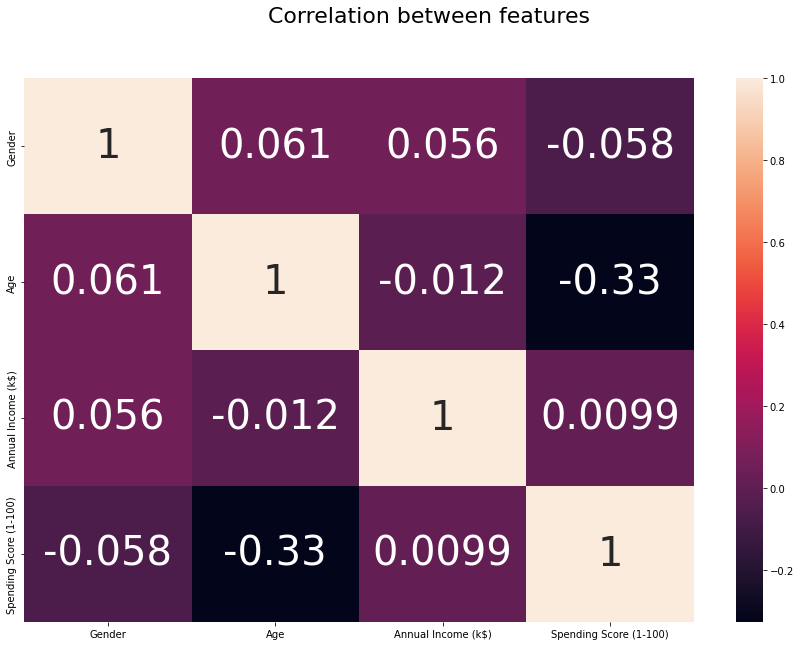

In [14]:
# Correlation between features
plt.subplots(figsize=(15,10))
plt.suptitle("Correlation between features", fontsize=22)
sns.heatmap(df.corr(), annot=True, annot_kws={"size": 40})
plt.show(); 

from the figure, we found that almost all features have weak correlation between them

# Fuzzy-c-means

In [15]:
#copy the dataframe
fuzzy_df = df.copy()
fuzzy_df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


## fitting the data

In [16]:
fcm = FCM(n_clusters=5)
fcm.fit(fuzzy_df.values)
fcm_centers = fcm.centers

In [17]:
#get the centers and the accuracy
pc = fcm.partition_coefficient
pec = fcm.partition_entropy_coefficient
print(f'centers =\n {fcm_centers},\n PC = {pc:.3f}, PEC = {pec:.3f}')


centers =
 [[ 0.40899418 47.85523583 56.11372968 48.58660436]
 [ 0.34520515 45.24433688 31.19265727 23.08414339]
 [ 0.41550737 32.53091162 83.02616844 81.1599147 ]
 [ 0.54396479 41.2952961  85.92199688 18.71418537]
 [ 0.41909119 25.55371357 28.97831358 74.89450916]],
 PC = 0.109, PEC = 0.272


## predict the data

In [18]:
fcm_labels = fcm.predict(fuzzy_df.values)

In [19]:
#add predicted clusters to the dataset
fuzzy_df['Fuzzy_cluster'] = fcm_labels
fuzzy_df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Fuzzy_cluster
0,1,19,15,39,1
1,1,21,15,81,4
2,0,20,16,6,1
3,0,23,16,77,4
4,0,31,17,40,1
...,...,...,...,...,...
195,0,35,120,79,2
196,0,45,126,28,3
197,1,32,126,74,2
198,1,32,137,18,3


## plot the clusters

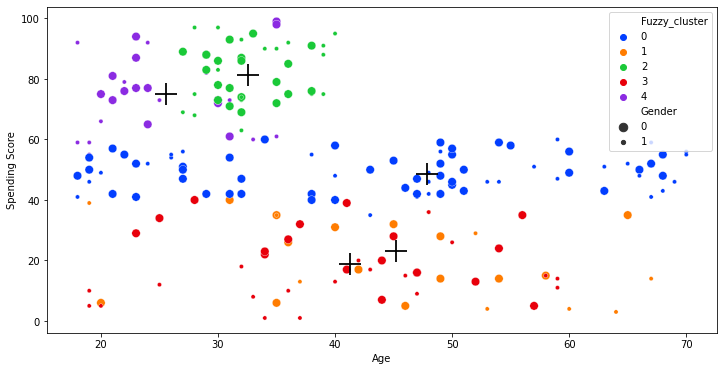

In [20]:
#plot clusters in the relationplot between age and Spending Score
plt.figure(figsize=(12,6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Fuzzy_cluster', size='Gender', data=fuzzy_df, palette = "bright")
sns.scatterplot(x=fcm_centers[:,1],y=fcm_centers[:,3], marker="+", s=500, c='black')
plt.legend(loc ="upper right")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show();

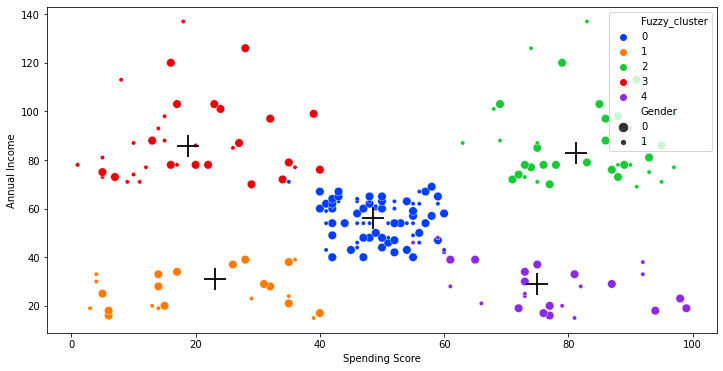

In [21]:
#plot clusters in the relationplot between Annual Income and Spending Score
plt.figure(figsize=(12,6))
sns.scatterplot(x='Spending Score (1-100)', y=r'Annual Income (k$)', hue='Fuzzy_cluster', size='Gender', data=fuzzy_df, palette = "bright")
sns.scatterplot(x=fcm_centers[:,3],y=fcm_centers[:,2], marker="+", s=500, c='black')
plt.legend(loc ="upper right")
plt.xlabel("Spending Score")
plt.ylabel("Annual Income")
plt.show();

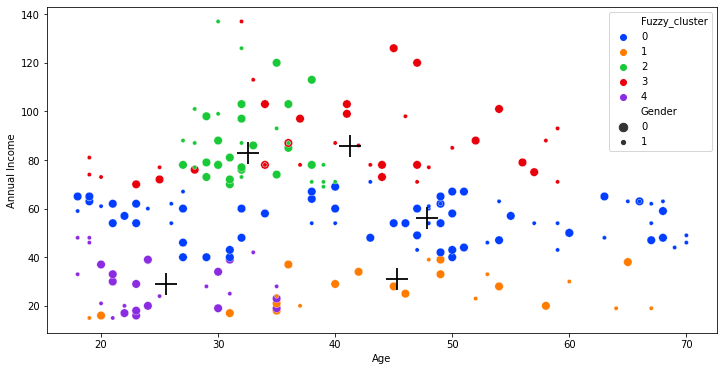

In [22]:
#plot clusters in the relationplot between age and Annual Income
plt.figure(figsize=(12,6))
sns.scatterplot(y='Annual Income (k$)', x='Age', hue='Fuzzy_cluster', size='Gender', data=fuzzy_df, palette = "bright")
sns.scatterplot(x=fcm_centers[:,1],y=fcm_centers[:,2], marker="+", s=500, c='black')
plt.legend(loc ="upper right")
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.show();

## get the membership function of the data

In [23]:
MFs = fcm.soft_predict(df.values)
MFs

array([[1.74804686e-01, 3.79470347e-01, 6.93869254e-02, 7.69780396e-02,
        2.99360001e-01],
       [6.03574906e-02, 4.97040799e-02, 4.38970596e-02, 2.24199630e-02,
        8.23621407e-01],
       [1.50628363e-01, 5.45186406e-01, 6.14115481e-02, 1.14898288e-01,
        1.27875395e-01],
       [5.06453614e-02, 4.23042987e-02, 3.34021522e-02, 1.78252419e-02,
        8.55822946e-01],
       [1.73664075e-01, 4.74743485e-01, 5.41365533e-02, 6.17477567e-02,
        2.35708130e-01],
       [4.63617817e-02, 3.86141866e-02, 3.04123663e-02, 1.62732910e-02,
        8.68338374e-01],
       [1.14122723e-01, 6.85899795e-01, 3.96243838e-02, 8.13368541e-02,
        7.90162439e-02],
       [8.74693980e-02, 6.34446001e-02, 8.06170496e-02, 3.40520995e-02,
        7.34416853e-01],
       [1.49209069e-01, 6.13274780e-01, 4.95175971e-02, 1.05805136e-01,
        8.21934178e-02],
       [4.95115315e-02, 4.00634439e-02, 2.65245033e-02, 1.49256031e-02,
        8.68974918e-01],
       [1.52128904e-01, 6.3459

In [24]:
#add it to the dataset
fuzzy_df['MF0'] = MFs[:,0]
fuzzy_df['MF1'] = MFs[:,1]
fuzzy_df['MF2'] = MFs[:,2]
fuzzy_df['MF3'] = MFs[:,3]
fuzzy_df['MF4'] = MFs[:,4]
fuzzy_df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Fuzzy_cluster,MF0,MF1,MF2,MF3,MF4
0,1,19,15,39,1,0.174805,0.379470,0.069387,0.076978,0.299360
1,1,21,15,81,4,0.060357,0.049704,0.043897,0.022420,0.823621
2,0,20,16,6,1,0.150628,0.545186,0.061412,0.114898,0.127875
3,0,23,16,77,4,0.050645,0.042304,0.033402,0.017825,0.855823
4,0,31,17,40,1,0.173664,0.474743,0.054137,0.061748,0.235708
...,...,...,...,...,...,...,...,...,...,...
195,0,35,120,79,2,0.144839,0.067374,0.543606,0.154911,0.089271
196,0,45,126,28,3,0.160012,0.094383,0.176179,0.498483,0.070943
197,1,32,126,74,2,0.157091,0.077254,0.478369,0.191235,0.096051
198,1,32,137,18,3,0.161754,0.109708,0.181130,0.463760,0.083648


## Apply the Alpha cut to the dataste

In [25]:
#if MFi > alpha , then AMFi = 1, else AMFi = 0
alpha = 0.285
fuzzy_df["AMF0"] = np.where(fuzzy_df.MF0 > alpha, 1, 0)
fuzzy_df["AMF1"] = np.where(fuzzy_df.MF1 > alpha, 1, 0)
fuzzy_df["AMF2"] = np.where(fuzzy_df.MF2 > alpha, 1, 0)
fuzzy_df["AMF3"] = np.where(fuzzy_df.MF3 > alpha, 1, 0)
fuzzy_df["AMF4"] = np.where(fuzzy_df.MF4 > alpha, 1, 0)

In [26]:
fuzzy_df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Fuzzy_cluster,MF0,MF1,MF2,MF3,MF4,AMF0,AMF1,AMF2,AMF3,AMF4
0,1,19,15,39,1,0.174805,0.379470,0.069387,0.076978,0.299360,0,1,0,0,1
1,1,21,15,81,4,0.060357,0.049704,0.043897,0.022420,0.823621,0,0,0,0,1
2,0,20,16,6,1,0.150628,0.545186,0.061412,0.114898,0.127875,0,1,0,0,0
3,0,23,16,77,4,0.050645,0.042304,0.033402,0.017825,0.855823,0,0,0,0,1
4,0,31,17,40,1,0.173664,0.474743,0.054137,0.061748,0.235708,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,35,120,79,2,0.144839,0.067374,0.543606,0.154911,0.089271,0,0,1,0,0
196,0,45,126,28,3,0.160012,0.094383,0.176179,0.498483,0.070943,0,0,0,1,0
197,1,32,126,74,2,0.157091,0.077254,0.478369,0.191235,0.096051,0,0,1,0,0
198,1,32,137,18,3,0.161754,0.109708,0.181130,0.463760,0.083648,0,0,0,1,0


In [27]:
AC_clusters = fuzzy_df[["AMF0", "AMF1", "AMF2", "AMF3", "AMF4"]]
AC_clusters = AC_clusters.to_numpy()
AC_clusters = np.argmax(AC_clusters,axis=1)
AC_clusters

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 0, 4,
       1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4,
       0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int64)

In [28]:
fuzzy_df["AC_clusters"] = AC_clusters
fuzzy_df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Fuzzy_cluster,MF0,MF1,MF2,MF3,MF4,AMF0,AMF1,AMF2,AMF3,AMF4,AC_clusters
0,1,19,15,39,1,0.174805,0.379470,0.069387,0.076978,0.299360,0,1,0,0,1,1
1,1,21,15,81,4,0.060357,0.049704,0.043897,0.022420,0.823621,0,0,0,0,1,4
2,0,20,16,6,1,0.150628,0.545186,0.061412,0.114898,0.127875,0,1,0,0,0,1
3,0,23,16,77,4,0.050645,0.042304,0.033402,0.017825,0.855823,0,0,0,0,1,4
4,0,31,17,40,1,0.173664,0.474743,0.054137,0.061748,0.235708,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,35,120,79,2,0.144839,0.067374,0.543606,0.154911,0.089271,0,0,1,0,0,2
196,0,45,126,28,3,0.160012,0.094383,0.176179,0.498483,0.070943,0,0,0,1,0,3
197,1,32,126,74,2,0.157091,0.077254,0.478369,0.191235,0.096051,0,0,1,0,0,2
198,1,32,137,18,3,0.161754,0.109708,0.181130,0.463760,0.083648,0,0,0,1,0,3


In [29]:
wrong_predict = fuzzy_df[fuzzy_df.Fuzzy_cluster != fuzzy_df.AC_clusters] 
wrong_predict

,Gender,Age,Annual Income (k$),Spending Score (1-100),Fuzzy_cluster,MF0,MF1,MF2,MF3,MF4,AMF0,AMF1,AMF2,AMF3,AMF4,AC_clusters
40,0,65,38,35,1,0.327117,0.456035,0.050633,0.084484,0.081731,1,1,0,0,0,0
42,1,48,39,36,1,0.292966,0.561182,0.031376,0.051981,0.062494,1,1,0,0,0,0
51,1,33,42,60,4,0.336059,0.113500,0.086794,0.049963,0.413684,1,0,0,0,1,0
142,0,28,76,40,3,0.306798,0.102244,0.150179,0.363643,0.077136,1,0,0,1,0,0
146,1,48,77,36,3,0.326667,0.085510,0.083951,0.458909,0.044963,1,0,0,1,0,0
160,0,56,79,35,3,0.311606,0.094938,0.089498,0.455868,0.048091,1,0,0,1,0,0


**alpha cut results in error if there is more than one membership function bigger than threshold so in this case applying arg max directly on the member functions is better** 

# Kmeans

In [30]:
#copy the dataframe
kmean_df = df.copy()
kmean_df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


## fitting and predicting the data

In [31]:
km = KMeans(n_clusters=5) 
km_labels = km.fit_predict(kmean_df.values)

In [32]:
#get the centers
km_centers = km.cluster_centers_
km_centers

array([[ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.51351351, 40.32432432, 87.43243243, 18.18918919],
       [ 0.39130435, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.40789474, 43.93421053, 55.21052632, 49.44736842],
       [ 0.44      , 24.96      , 28.04      , 77.        ]])

In [33]:
#add predicted clusters to the dataset
kmean_df['KMean_cluster'] = km_labels
kmean_df

,Gender,Age,Annual Income (k$),Spending Score (1-100),KMean_cluster
0,1,19,15,39,2
1,1,21,15,81,4
2,0,20,16,6,2
3,0,23,16,77,4
4,0,31,17,40,2
...,...,...,...,...,...
195,0,35,120,79,0
196,0,45,126,28,1
197,1,32,126,74,0
198,1,32,137,18,1


## plot the clusters

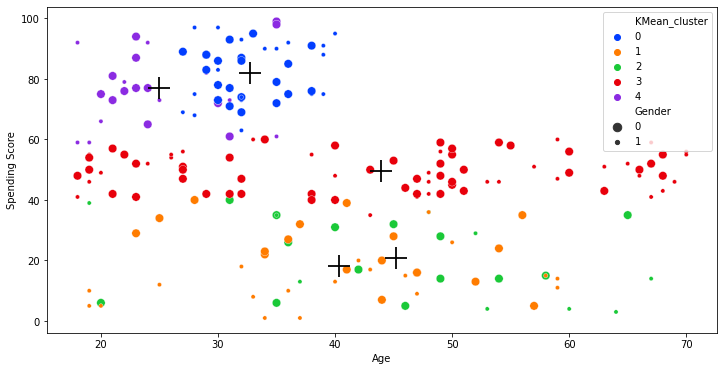

In [34]:
#plot clusters in the relationplot between age and Spending Score
plt.figure(figsize=(12,6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='KMean_cluster', size='Gender', data=kmean_df, palette = "bright")
sns.scatterplot(x=km_centers[:,1],y=km_centers[:,3], marker="+", s=500, c='black')
plt.legend(loc ="upper right")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show();

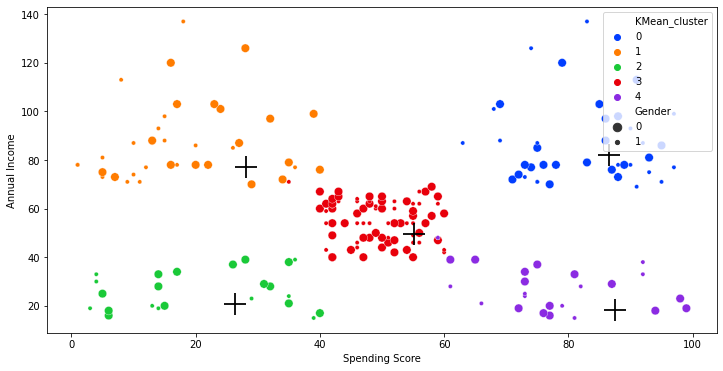

In [35]:
#plot clusters in the relationplot between Annual Income and Spending Score
plt.figure(figsize=(12,6))
sns.scatterplot(x='Spending Score (1-100)', y=r'Annual Income (k$)',
                hue='KMean_cluster', size='Gender', data=kmean_df, palette = "bright")
sns.scatterplot(x=km_centers[:,2],y=km_centers[:,3], marker="+", s=500, c='black')
plt.legend(loc ="upper right")
plt.ylabel("Annual Income")
plt.xlabel("Spending Score")
plt.show();

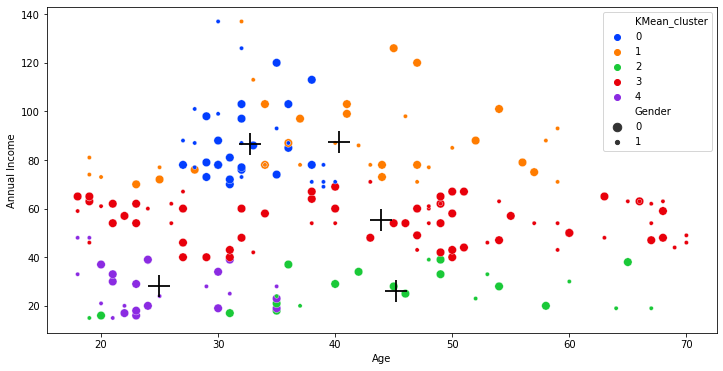

In [36]:
#plot clusters in the relationplot between Annual Income and age
plt.figure(figsize=(12,6))
sns.scatterplot(y='Annual Income (k$)', x='Age', hue='KMean_cluster', size='Gender', data=kmean_df, palette = "bright")
sns.scatterplot(x=km_centers[:,1],y=km_centers[:,2], marker="+", s=500, c='black')
plt.legend(loc ="upper right")
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.show();

***after training we found that c means is better than k means in terms of accuracy and clustering but requires more time and computational power to compute***